### Evaluation of Distance Measures
***
***

Set working directory and load the distances that have been calculated in the first notebook.

In [192]:
setwd("C:/Users/stein/Dropbox/Studium/7. Semester/BA-Thesis/BA-Thesis_NorthEuraLex")

ldn_dists = read.csv("./language_distances/ldn_dists.csv")
ldnd_dists = read.csv("./language_distances/ldnd_dists.csv")
pmi_dists = read.csv("./language_distances/pmi_based_dists2.csv")

***
Load NorthEuraLex language data and use it to add rownames to distance data.

In [193]:
library(tidyverse)

geodata = read_tsv("./data/northeuralex-0.9-language-data.tsv")

rownames(ldn_dists) = rownames(ldnd_dists) = rownames(pmi_dists) = geodata$glotto_code

Rows: 107 Columns: 7
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): name, glotto_code, iso_code, family, subfamily
dbl (2): latitude, longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


***
The next step is to use the PMI-based distance matrix to make a phylogenetic tree of a subset of the languages - the Uralic languages. Start by taking the relevants rows / columns of the distance matrix. The rows are renamed to have the language names instead of the glotto codes as label names in the dendrogram later.

In [194]:
uralic_dists = pmi_dists[1:26, 1:26]
rownames(uralic_dists) = head(geodata, 26)$name
head(uralic_dists)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Finnish,1.0000000,0.2020306,0.2671554,0.3877505,0.2987612,0.4980926,0.9501134,1.130384,1.182634,1.143173,⋯,1.0468870,1.285144,1.171774,1.099220,1.316005,1.325798,1.257502,1.473402,1.435060,1.285972
North Karelian,0.2020306,1.0000000,0.2312442,0.3928244,0.2495400,0.4996734,0.8892533,1.056352,1.139539,1.097643,⋯,1.0597123,1.245479,1.171167,1.146900,1.392662,1.377118,1.266016,1.450428,1.418958,1.345705
Olonets Karelian,0.2671554,0.2312442,1.0000000,0.3705025,0.3002269,0.4507320,0.9490869,1.126955,1.171226,1.141359,⋯,0.9827500,1.245379,1.205418,1.095158,1.291223,1.362988,1.142944,1.386363,1.417617,1.249271
Veps,0.3877505,0.3928244,0.3705025,1.0000000,0.3734886,0.5237560,1.0676698,1.252276,1.231458,1.197169,⋯,1.0920060,1.252768,1.198535,1.176813,1.364681,1.366861,1.262586,1.606771,1.565917,1.290821
Estonian,0.2987612,0.2495400,0.3002269,0.3734886,1.0000000,0.4186482,0.9189513,1.030004,1.110358,1.121856,⋯,1.0004142,1.221026,1.168392,1.176038,1.237816,1.240266,1.194810,1.541334,1.420545,1.307780
Livonian,0.4980926,0.4996734,0.4507320,0.5237560,0.4186482,1.0000000,1.0113933,1.120942,1.170445,1.121669,⋯,0.9606459,1.132650,1.074354,1.189248,1.137700,1.317145,1.253934,1.464078,1.398307,1.240765


***
Apply neighbor joining on the resulting matrix and plot the tree. The package _ape_ needs to be loaded for the function _nj_ to be available. 

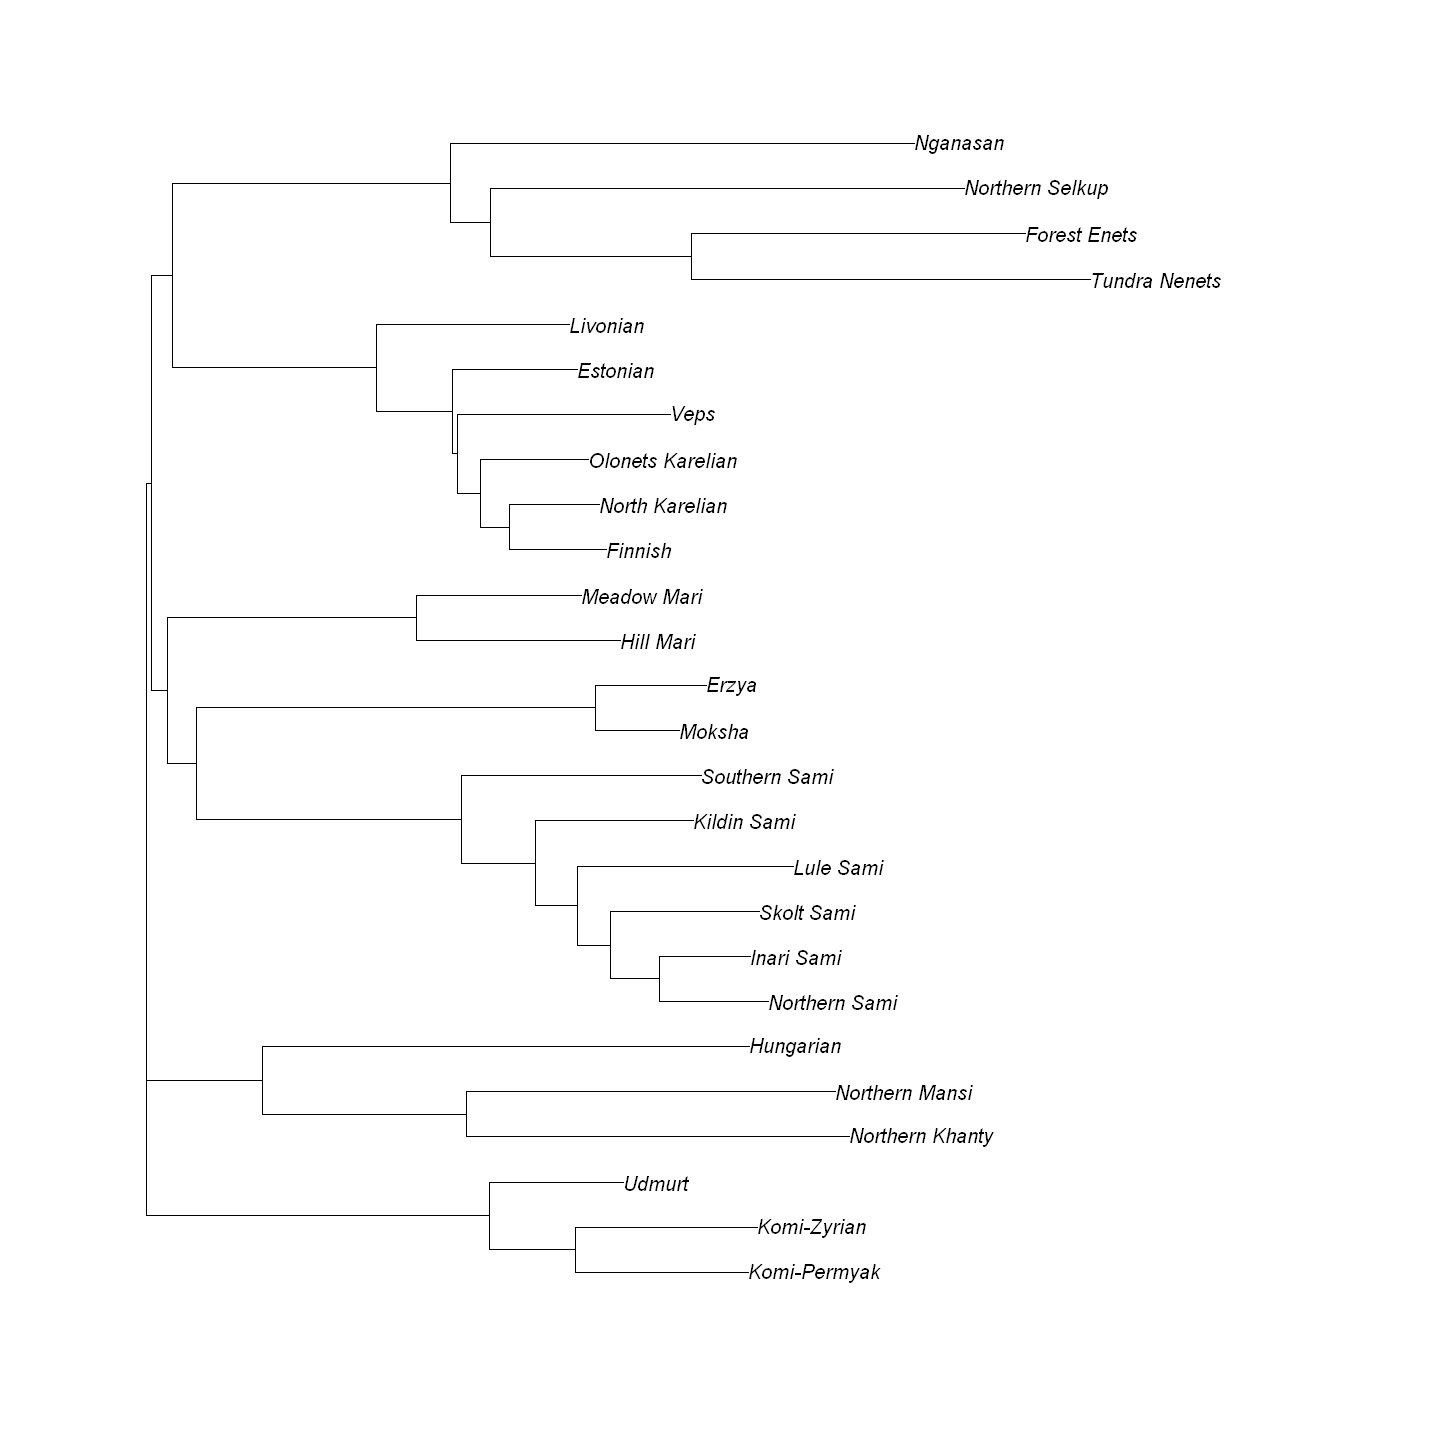

In [195]:
library(ape)
nj_uralic = nj(as.dist(uralic_dists))
plot(nj_uralic)

***
Some modifications to the plot are made, to highlight the different subfamilies.

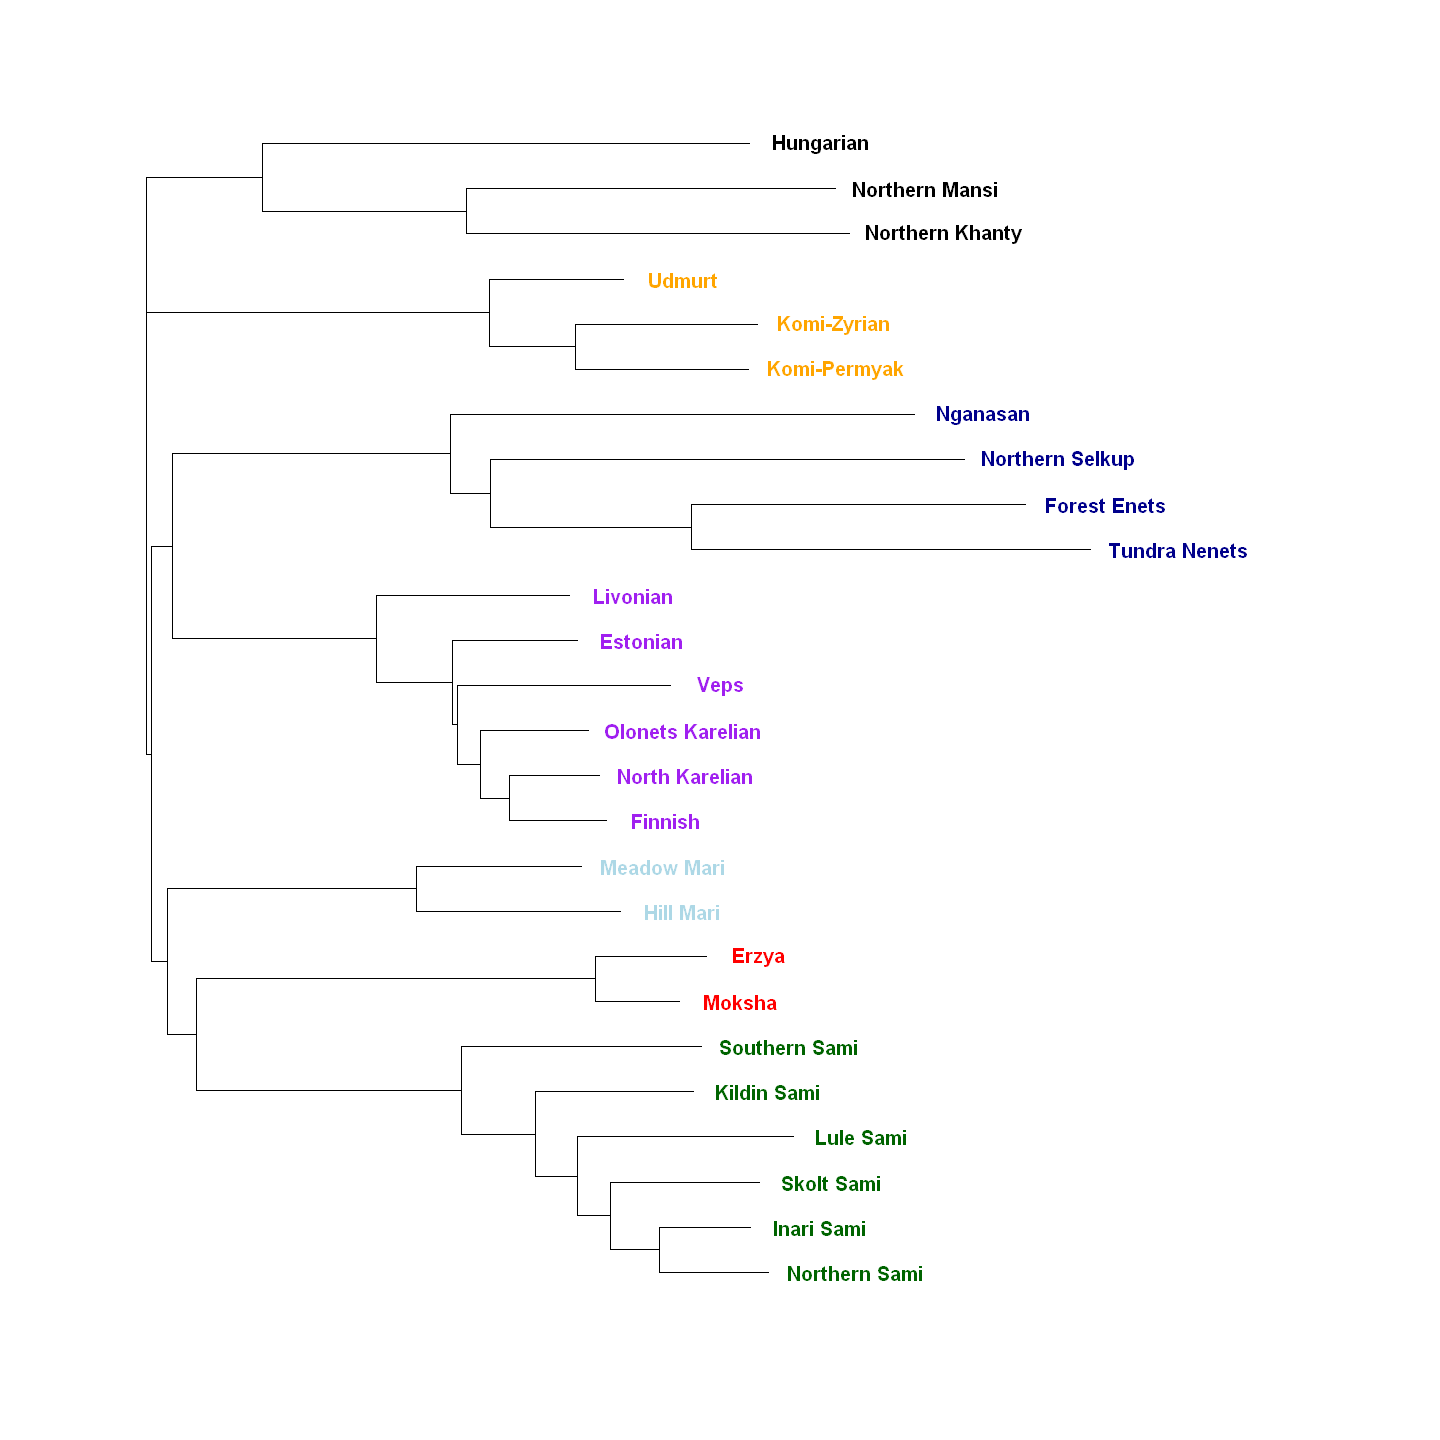

In [196]:
# set colours for the plot
dendro_cols = def(nj_uralic$tip.label, Erzya = "red", Moksha = "red", "Southern Sami" = "darkgreen",
                  "Kildin Sami" = "darkgreen", "Skolt Sami" = "darkgreen", "Lule Sami" = "darkgreen", 
                  "Inari Sami" = "darkgreen", "Northern Sami" = "darkgreen", Nganasan = "darkblue", 
                  "Tundra Nenets" = "darkblue", "Forest Enets" = "darkblue", "Northern Selkup" = "darkblue", 
                  "Meadow Mari" = "lightblue", "Hill Mari" = "lightblue", Udmurt = "orange", 
                  "Komi-Permyak" = "orange", "Komi-Zyrian" = "orange", Livonian = "purple", 
                  Estonian = "purple", Veps = "purple", "Olonets Karelian" = "purple", 
                  "North Karelian" = "purple", Finnish = "purple", default = "black")

# ladderizing the tree makes it more 'tidy'
nj_uralic = nj_uralic %>% ladderize()

# use a few optional plot arguments
options(repr.plot.width=12, repr.plot.height=12)
plot(nj_uralic, tip.color = dendro_cols, font = 2, edge.width = 1.0, adj = 0.1)

***
Create 24 neighbor joining / FastME trees, six for all 107 languages of NorthEuraLex and for the four biggest families represented in it.

In [198]:
# build trees for a subset of the distance matrix
build_trees = function(range) {
    
    nj_ldn = nj(as.dist(ldn_dists[range, range]))
    fastme_ldn = fastme.bal(as.dist(ldn_dists[range, range]))
    
    nj_ldnd = nj(as.dist(ldnd_dists[range, range]))
    fastme_ldnd = fastme.bal(as.dist(ldnd_dists[range, range]))
    
    nj_pmi = nj(as.dist(pmi_dists[range, range]))
    fastme_pmi = fastme.bal(as.dist(pmi_dists[range, range]))
    
    list(nj_ldn, fastme_ldn, nj_ldnd, fastme_ldnd, nj_pmi, fastme_pmi)
}

# build the trees
northeura_trees = build_trees(1:107)
uralic_trees = build_trees(1:26)
indo_trees = build_trees(27:63)
turkic_trees = build_trees(64:71)

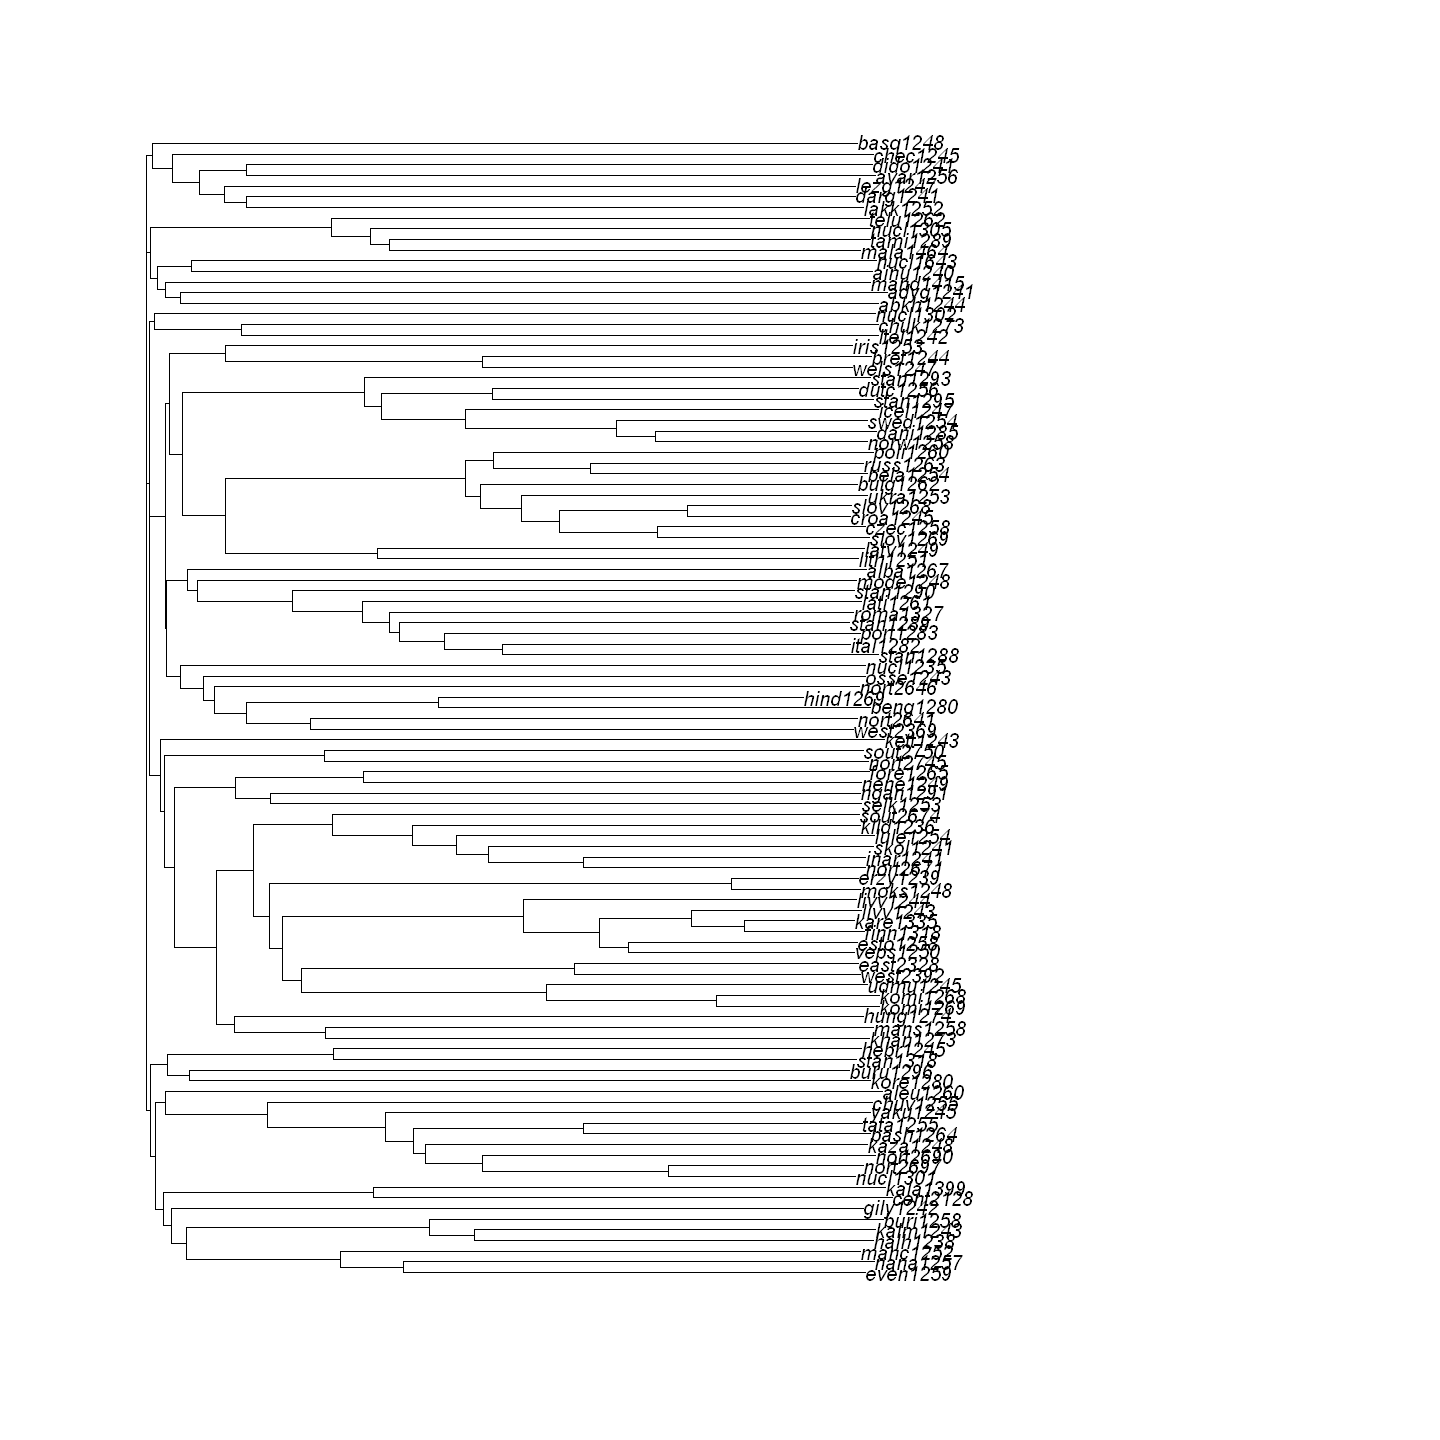

In [216]:
plot(northeura_trees[[3]])

***
Use the _glottoTrees_ package to load a Glottolog supertree, containing all the languoids in the Glottolog from Africa, Eurasia and North America.

In [209]:
library(glottoTrees)
# build the supertree and shorten the labels to only consist of the glottocode
supertree = assemble_supertree(macro_groups = NULL) %>% abridge_labels()

Warning message in abridge_labels(.):
"Labels without glottocodes were detected and left unchanged for: 0 tip(s); 1 node(s): World"


***
Remove all languoids from the tree that are not part of the 107 NorthEuraLex languages.

In [210]:
glottree = keep_as_tip(supertree, geodata$glotto_code)

***
Also build the Glottolog trees for the three language families which are represented with the most languages in the NorthEuraLex data.

In [211]:
# get the family tree and then remove all languages that are not in the NorthEuraLex data set 
glottree_uralic = get_glottolog_trees("Uralic") %>% abridge_labels() %>% 
                        keep_as_tip(head(geodata, 26)$glotto_code)
glottree_indo = get_glottolog_trees("Indo-European") %>% abridge_labels() %>% 
                        keep_as_tip(slice(geodata, 27:63)$glotto_code) %>%
                        # The Indo-European tree is rooted, while the others are not, and needs to be unrooted. 
                        # Otherwise calling QuartetStatus on it later does not work.
                        unroot()
glottree_turkic = get_glottolog_trees("Turkic") %>% abridge_labels() %>% 
                        keep_as_tip(slice(geodata, 64:71)$glotto_code)

***
Load the _Quartet_ package to compute the quartet distances and the _TreeDist_ package to create randomised trees. Then compare the six trees from each region (all languages, Uralic, Indo-European, Turkic) to the Glottolog tree, with the symmetric divergence (SD) and the similarity to reference (S2R). Additionally, 100 random trees are created and then compared with the GlottoTree to have a benchmark for what the distance between random trees is. 
 
(The resulting scores are more neatly displayed in Table 4 of the thesis)

In [212]:
# for reproduction purposes a set is set (for the random trees generated with the rmtree method)
set.seed(42)
library(Quartet)
library(TreeDist)

# this function scores a set of trees with regards to the reference 'glotto_tree'
score_trees = function(trees, glotto_tree, range) {
    
    statuses = QuartetStatus(trees, glotto_tree)
    # create 100 random trees
    random_forest = rmtree(100, length(range), tip.label = slice(geodata, range)$glotto_code)
    # compare them all pairwise
    random_statuses = QuartetStatus(random_forest, glotto_tree)

    # compute number of differently resolved quartets
    d = statuses[,4]
    d_rand = mean(random_statuses[,4])
    
    # compute SD scores
    sd = QuartetDivergence(statuses, similarity = F)
    sd_rand = mean(QuartetDivergence(random_statuses, similarity = F))
    
    # compute S2R scores
    s2r = SimilarityToReference(statuses, similarity = F, normalize = T)
    s2r_rand = mean(SimilarityToReference(random_statuses, similarity = F, normalize = T))
    
    list(d, d_rand, sd, sd_rand, s2r, s2r_rand)
}

# call the function for each group of languages
northeura_scores = score_trees(northeura_trees, glottree, 1:107)
uralic_scores = score_trees(uralic_trees, glottree_uralic, 1:26)
indo_scores = score_trees(indo_trees, glottree_indo, 27:63)
turkic_scores = score_trees(turkic_trees, glottree_turkic, 64:71)
mix_score = score_trees(uralic_indo_turkic_trees, glottree_uralic_indo_turkic, 1:71)

# Output the four lists containing the scores
northeura_scores
indo_scores
uralic_scores
turkic_scores
mix_score

[[1]]
[1] 27411 26308 12168 10054 18711 19857

[[2]]
[1] 2049003

[[3]]
[1] 0.2076316 0.2074178 0.2046778 0.2042682 0.2059457 0.2061678

[[4]]
[1] 0.5993666

[[5]]
[1] 0.013382443 0.012843943 0.005940592 0.004908507 0.009134979 0.009694472

[[6]]
[1] 1.000353

[[1]]
[1] 1986 1396 1406 1396 1290 1290

[[2]]
[1] 31235.42

[[3]]
[1] 0.1760391 0.1671058 0.1672572 0.1671058 0.1655008 0.1655008

[[4]]
[1] 0.6189101

[[5]]
[1] 0.06370285 0.04477803 0.04509879 0.04477803 0.04137798 0.04137798

[[6]]
[1] 1.001906

[[1]]
[1] 422 399 422 399 359 355

[[2]]
[1] 5891.07

[[3]]
[1] 0.2371572 0.2356187 0.2371572 0.2356187 0.2329431 0.2326756

[[4]]
[1] 0.6029813

[[5]]
[1] 0.07273354 0.06876939 0.07273354 0.06876939 0.06187522 0.06118580

[[6]]
[1] 1.015352

[[1]]
[1] 14 14 12 12 12 12

[[2]]
[1] 31.28

[[3]]
[1] 0.3642857 0.3642857 0.3357143 0.3357143 0.3357143 0.3357143

[[4]]
[1] 0.6111429

[[5]]
[1] 0.4468085 0.4468085 0.3829787 0.3829787 0.3829787 0.3829787

[[6]]
[1] 0.9982979

[[1]]
[1] 5518 4570 5908 4570 4236 4506

[[2]]
[1] 482228.2

[[3]]
[1] 0.1339896 0.1330139 0.1343910 0.1330139 0.1326702 0.1329481

[[4]]
[1] 0.6246165

[[5]]
[1] 0.011459339 0.009490608 0.012269259 0.009490608 0.008796984 0.009357698

[[6]]
[1] 1.001453